In [1]:
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
with open('trip_data_8.csv', 'r') as f:
    Taxi = csv.DictReader(f)
    h = 0
    for file in Taxi:
        h += 1
        if h == 1:
            start_date = file[' pickup_datetime']
        else:
            end_date = file[' dropoff_datetime']

# Print the results
print(f'Total rows: {h}')
print(f'Starting Date: {start_date}, Ending Date: {end_date}')

Total rows: 12597109
Starting Date: 2013-08-30 07:57:00, Ending Date: 2013-08-11 10:16:00


In [19]:
with open('trip_data_8.csv', 'r') as f:
    Taxi = csv.DictReader(f)
    h = 0
    for i in Taxi:
        h += 1
        if h < 6:
            print(i)
        else:
            break

{'medallion': '3418135604CD3F357DD9577AF978C5C0', ' hack_license': 'B25386A1F259C87449430593E904FDBC', ' vendor_id': 'VTS', ' rate_code': '1', ' store_and_fwd_flag': '', ' pickup_datetime': '2013-08-30 07:57:00', ' dropoff_datetime': '2013-08-30 08:30:00', ' passenger_count': '5', ' trip_time_in_secs': '1980', ' trip_distance': '14.58', ' pickup_longitude': '-73.791359', ' pickup_latitude': '40.645657', ' dropoff_longitude': '-73.922501', ' dropoff_latitude': '40.758766'}
{'medallion': '6D3B2A7682C30DCF64F3F12976EF93B6', ' hack_license': 'A603A9D5FAA46E8FF2A97A143328D938', ' vendor_id': 'CMT', ' rate_code': '1', ' store_and_fwd_flag': 'N', ' pickup_datetime': '2013-08-30 23:26:23', ' dropoff_datetime': '2013-08-30 23:46:01', ' passenger_count': '2', ' trip_time_in_secs': '1177', ' trip_distance': '11.00', ' pickup_longitude': '-73.862724', ' pickup_latitude': '40.769062', ' dropoff_longitude': '-73.976845', ' dropoff_latitude': '40.764595'}
{'medallion': '6D49E494913752B75B2685E0019FF3

In [20]:
pickup_lat_min = 90
pickup_lat_max = -90
pickup_long_min = 180
pickup_long_max = -180
dropoff_lat_min = 90
dropoff_lat_max = -90
dropoff_long_min = 180
dropoff_long_max = -180
i = 0
with open('trip_data_8.csv', 'r') as df:
    h = csv.DictReader(df)
    for row in h:
        if i > 0:
            try:
                pickup_lat = float(row[' pickup_latitude'])
                pickup_long = float(row[' pickup_longitude'])
                dropoff_lat = float(row[' dropoff_latitude'])
                dropoff_long = float(row[' dropoff_longitude'])
                if (-74.4 <= pickup_long <= -72.05 and 40.4 <= pickup_lat<= 41.02):
                    pickup_lat_min = min(pickup_lat_min, pickup_lat)
                    pickup_lat_max = max(pickup_lat_max, pickup_lat)
                    pickup_long_min = min(pickup_long_min, pickup_long)
                    pickup_long_max = max(pickup_long_max, pickup_long)
                if dropoff_long is not None and (-74.5 <= dropoff_long <= -72.02 and 40.75 <= dropoff_lat<= 41):
                    dropoff_lat_min = min(dropoff_lat_min, dropoff_lat)
                    dropoff_lat_max = max(dropoff_lat_max, dropoff_lat)
                    dropoff_long_min = min(dropoff_long_min, dropoff_long)
                    dropoff_long_max = max(dropoff_long_max, dropoff_long)
            except ValueError:
                continue
        i+=1
        if i > 1000000000:
            break
print("pickup_latitude_min: " ,pickup_lat_min)
print("pickup_longitude_min: ",pickup_long_min)

print("pickup_latitude_max: ",pickup_lat_max)
print("pickup_longitude_max: ",pickup_long_max)

print("dropoff_latitude_min: ",dropoff_lat_min)
print("dropoff_longitude_min: ",dropoff_long_min)

print("dropoff_latitude_max: ",dropoff_lat_max)
print("dropoff_longitude_max: ",dropoff_long_max)

pickup_latitude_min:  40.402771
pickup_longitude_min:  -74.398354
pickup_latitude_max:  41.019707
pickup_longitude_max:  -72.113411
dropoff_latitude_min:  40.75
dropoff_longitude_min:  -74.5
dropoff_latitude_max:  40.999908
dropoff_longitude_max:  -72.307014


In [1]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
   
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3958.8 # Radius of earth in kilometers. Use 3958.8 for miles.
    return c * r

In [9]:
import csv
f = open('trip_data_8.csv', 'r') 
data = csv.DictReader(f)
avg_dist = []
for row in data:
    if row[' pickup_longitude'] == '' or row[' pickup_latitude'] == '' or row[' dropoff_longitude']=='' or row[' dropoff_latitude']=='':
        continue
    else:
        d = round(haversine(float(row[' pickup_longitude']),float(row[' pickup_latitude']),float(row[' dropoff_longitude']),float(row[' dropoff_latitude'])),2)
        avg_dist.append(d)


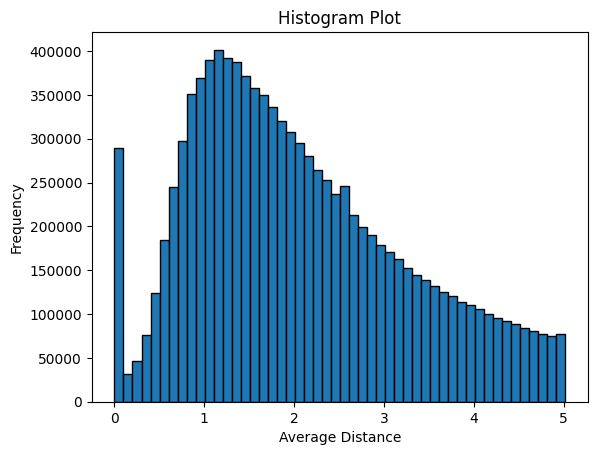

In [12]:
import matplotlib.pyplot as plt

no_bins = 50  
plt.hist(avg_dist, bins = no_bins, edgecolor = 'k', range = (0.0, 5.02))
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
plt.show()

In [17]:
from collections import defaultdict
import csv
dv = defaultdict(set)

with open('trip_data_8.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    h = 0
    for i in csv_reader:
        h += 1
        if h < 1000:
            for key, value in i.items():
                dv[key].add(value)
        else:
            break

# Print distinct values for each field
for field, values in dv.items():
    print(f"{field}: {', '.join(values)}")

medallion: 507F47C5C2DC51740BFFA7FA2895CB0C, BCB4D4D1057F21465C0B5DB60DEB3297, 87077D0B254D4966BE39E9D973D603C6, ABED701899D7BD70D97EC643040B6CF8, 9F4C63E44A6C97DE0EF88E537954FC33, CECFCD256DD02517B8D0BF64DAAEFDB8, 8188638776500907CE29E05D8E308EEF, 4CA0195D05D0D58E0CDB362643AB84DF, 9A4969466BB497F10FF42E6AAE997E8F, A0F0A088C9AA6DBBD17F0E7E1E6D3090, B90B1581F569B2041977CFFC3470D543, 8A6F61BD5F45066A5773A2AF58E113FF, 6AC551DA4299581A398D8A9D0AC7C25F, 853151C6F787D0A13F59EEF12F5B73A8, F5BD51C544CA21C66E7706716DA74D60, 6B744CE7D56C2A338B8E3E718E611D2E, 3418135604CD3F357DD9577AF978C5C0, CEBDF34FE2DA2E9233B87C2E703004FF, 5AB1790349552C601166122F117D8818, F4AC9004AEFB821FAF80B52F4B724274, 7FFA9CB04343F2B0FEA0D081AB446D14, AED42731D27E4B573D9B007D2EAA35B6, 49ADB4AB6C594725DE9A363F9A940303, 469F250223E3C6B213079BDC116DA38A, DDC1AE28890B301D015A319435E52E58, 22A2D7755C47F121F7E50EE953C74348, 6893BD66639F1F6BD44F8AF1A2756145, 244FB25A3C83E7DDBDBEA382C64964B1, 98CC2306ECF40069A2F9835D57E678EC, 36D

In [20]:
nf = [' passenger_count', ' trip_time_in_secs', ' trip_distance']
min_max_values = {}

for f in nf:
    values = [float(row[f]) for i in csv.DictReader(open('trip_data_8.csv', 'r'))]
    min_max_values[f] = {'min': min(values), 'max': max(values)}

# Print min and max values for numeric fields
for f, values in min_max_values.items():
    print(f"{f}: Min - {values['min']}, Max - {values['max']}")

 passenger_count: Min - 1.0, Max - 1.0
 trip_time_in_secs: Min - 252.0, Max - 252.0
 trip_distance: Min - 2.0, Max - 2.0


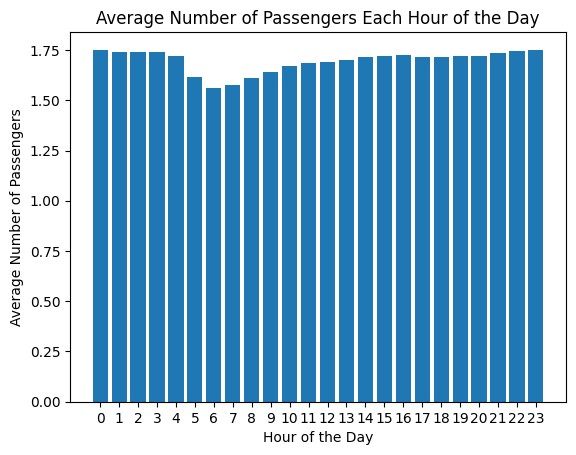

In [26]:
pph = defaultdict(list)

with open('trip_data_8.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    
    for i in csv_reader:
        pickup_hour = int(i[' pickup_datetime'].split()[1].split(':')[0])
        pph[pickup_hour].append(int(i[' passenger_count']))

apph = {hour: sum(passengers) / len(passengers) for hour, passengers in pph.items()}

# Create chart
plt.bar(apph.keys(), apph.values())
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers Each Hour of the Day')
plt.xticks(range(24))
plt.show()

In [27]:
with open('trip_data_8.csv', 'r') as inf, open('reduced_data.csv', 'w', newline='') as of:
    csv_reader = csv.reader(inf)
    csv_writer = csv.writer(of)
    
    for i, r in enumerate(csv_reader):
        if i % 1000 == 0:
            csv_writer.writerow(r)

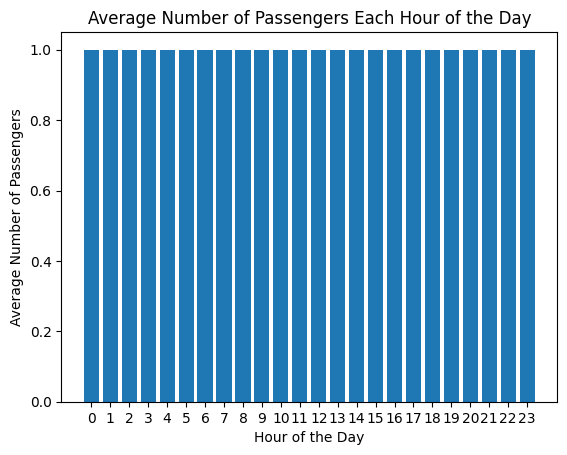

In [28]:
pph = defaultdict(list)

with open('reduced_data.csv', 'r') as file:
    csv = csv.DictReader(file)
    
    for i in csv:
        pickup_hour = int(i[' pickup_datetime'].split()[1].split(':')[0])
        pph[pickup_hour].append(int(row[' passenger_count']))

apph = {hour: sum(passengers) / len(passengers) for hour, passengers in pph.items()}

# Create chart
plt.bar(apph.keys(), apph.values())
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers Each Hour of the Day')
plt.xticks(range(24))
plt.show()